<a href="https://colab.research.google.com/github/Theivaprakasham/Projects/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR Project - High-Level Inference using EASYOCR


**Introduction:**
Authored by: Theivaprakasham H

In [1]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 14 kB/s 


In [2]:
import easyocr
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image, ImageDraw
import cv2

In [3]:
#reader = easyocr.Reader(['hi', 'en', 'kn', 'mai', 'mr', 'ta', 'te', 'ur'])
reader = easyocr.Reader(['te', 'en'])

In [4]:
!wget "https://i.pinimg.com/736x/60/9b/b7/609bb7b5e866cd5a334568d72a08ff7e.jpg"

--2021-08-25 08:32:44--  https://i.pinimg.com/736x/60/9b/b7/609bb7b5e866cd5a334568d72a08ff7e.jpg
Resolving i.pinimg.com (i.pinimg.com)... 104.71.132.190, 2606:4700::6812:fb0, 2606:4700::6812:eb0
Connecting to i.pinimg.com (i.pinimg.com)|104.71.132.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85333 (83K) [image/jpeg]
Saving to: ‘609bb7b5e866cd5a334568d72a08ff7e.jpg’

609bb7b5e866cd5a334 100%[===================>]  83.33K  --.-KB/s    in 0.02s   

2021-08-25 08:32:44 (5.27 MB/s) - ‘609bb7b5e866cd5a334568d72a08ff7e.jpg’ saved [85333/85333]



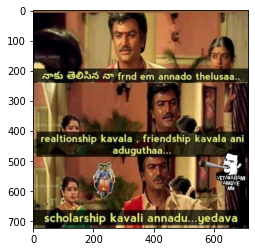

In [5]:
plt.imshow(np.array(Image.open('/content/609bb7b5e866cd5a334568d72a08ff7e.jpg')))

In [6]:
result = reader.readtext('https://i.pinimg.com/736x/60/9b/b7/609bb7b5e866cd5a334568d72a08ff7e.jpg', detail = 1, paragraph=True);result

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[[[[25, 197], [673, 197], [673, 241], [25, 241]],
  'నాకు తెలిసిన నా frnd em annado thelusaa'],
 [[[17, 400], [706, 400], [706, 492], [17, 492]],
  'realtionship kavala friendship kavala ani aduguthaa'],
 [[[603, 540], [706, 540], [706, 601], [603, 601]], 'VETANARAM AKNUVE MK'],
 [[[27, 657], [685, 657], [685, 721], [27, 721]],
  'scholarship kavali annadu: Uedava']]

In [7]:
boxes = reader.detect('https://i.pinimg.com/736x/60/9b/b7/609bb7b5e866cd5a334568d72a08ff7e.jpg');boxes

([[[25, 673, 197, 241],
   [17, 336, 400, 454],
   [355, 706, 402, 452],
   [257, 436, 443, 492],
   [603, 706, 540, 570],
   [623, 686, 560, 586],
   [639, 671, 581, 601],
   [27, 521, 657, 721],
   [538, 685, 663, 719]]],
 [[]])

In [8]:
IMAGE_PATH = '/content/609bb7b5e866cd5a334568d72a08ff7e.jpg'

In [11]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

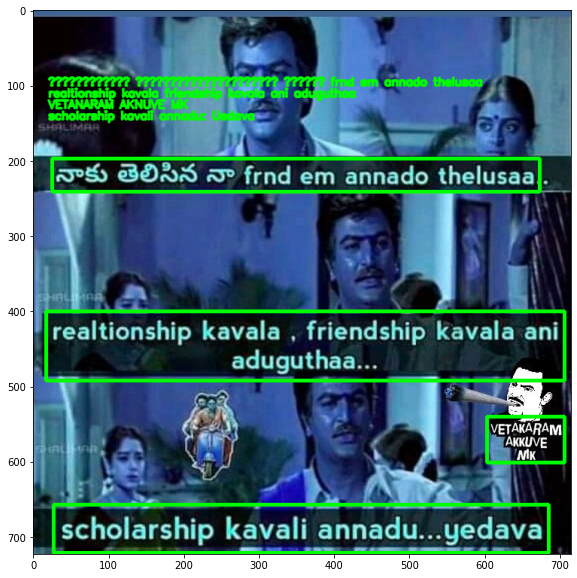

In [12]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3) # draw the bounding boxes on the image
    img = cv2.putText(img,text,(20,spacer),font, 0.5,(0,255,0),2,cv2.LINE_AA) # Add Text to the bounding box
    spacer+=15

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [13]:
# Doing OCR. Get bounding boxes.
results = reader.readtext(IMAGE_PATH)
results

[([[25, 197], [673, 197], [673, 241], [25, 241]],
  'నాకు తెలిసిన నా frnd em annado thelusaa',
  0.4405264657947641),
 ([[17, 400], [336, 400], [336, 454], [17, 454]],
  'realtionship kavala',
  0.7204699439927609),
 ([[355, 402], [706, 402], [706, 452], [355, 452]],
  'friendship kavala ani',
  0.633574459393187),
 ([[257, 443], [436, 443], [436, 492], [257, 492]],
  'aduguthaa',
  0.8714130560965586),
 ([[603, 540], [706, 540], [706, 570], [603, 570]],
  'VETANARAM',
  0.7538240561778704),
 ([[623, 560], [686, 560], [686, 586], [623, 586]],
  'AKNUVE',
  0.5512186995119757),
 ([[639, 581], [671, 581], [671, 601], [639, 601]], 'MK', 0.9948154995272831),
 ([[27, 657], [521, 657], [521, 721], [27, 721]],
  'scholarship kavali annadu:',
  0.7251264220730126),
 ([[538, 663], [685, 663], [685, 719], [538, 719]],
  'Uedava',
  0.5493371456967053)]

In [14]:
!wget "https://github.com/texttechnologylab/DHd2019BoA/blob/master/fonts/Arial%20Unicode%20MS.TTF?raw=true"

--2021-08-25 08:34:22--  https://github.com/texttechnologylab/DHd2019BoA/blob/master/fonts/Arial%20Unicode%20MS.TTF?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/texttechnologylab/DHd2019BoA/raw/master/fonts/Arial%20Unicode%20MS.TTF [following]
--2021-08-25 08:34:22--  https://github.com/texttechnologylab/DHd2019BoA/raw/master/fonts/Arial%20Unicode%20MS.TTF
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/texttechnologylab/DHd2019BoA/master/fonts/Arial%20Unicode%20MS.TTF [following]
--2021-08-25 08:34:23--  https://raw.githubusercontent.com/texttechnologylab/DHd2019BoA/master/fonts/Arial%20Unicode%20MS.TTF
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connec

నాకు తెలిసిన నా frnd em annado thelusaa
realtionship kavala
friendship kavala ani
aduguthaa
VETANARAM
AKNUVE
MK
scholarship kavali annadu:
Uedava


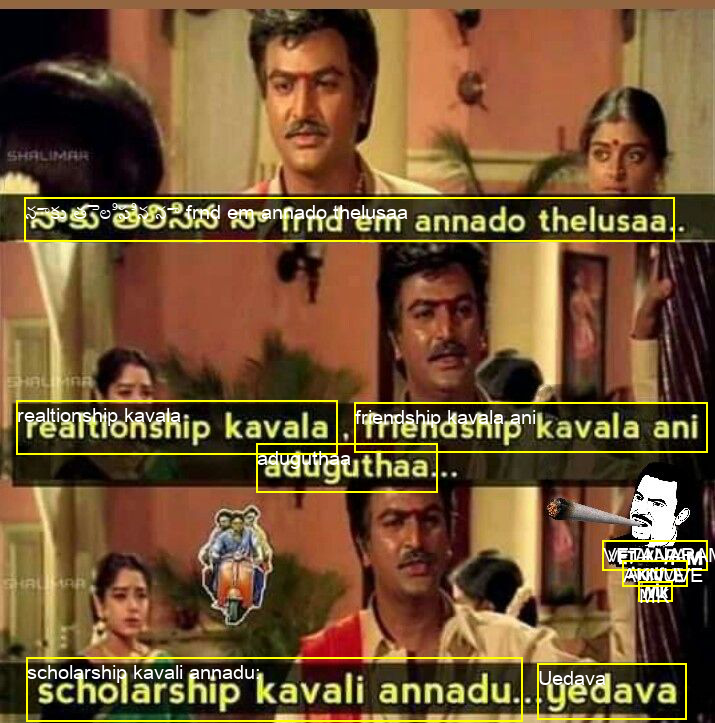

In [15]:
# Draw bounding boxes
font = PIL.ImageFont.truetype("/content/Arial Unicode MS.TTF?raw=true",20)
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in results:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
        print(bound[1])
        draw.text(p0, bound[1], font = font, align ="left")
    return image

draw_boxes(Image.open(IMAGE_PATH), results)

In [16]:
!wget "https://indatalabs.com/wp-content/uploads/2019/09/OCR-NLP--489x640.png"

--2021-08-25 08:34:40--  https://indatalabs.com/wp-content/uploads/2019/09/OCR-NLP--489x640.png
Resolving indatalabs.com (indatalabs.com)... 52.88.6.52
Connecting to indatalabs.com (indatalabs.com)|52.88.6.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112601 (110K) [image/png]
Saving to: ‘OCR-NLP--489x640.png’

OCR-NLP--489x640.pn 100%[===================>] 109.96K  --.-KB/s    in 0.03s   

2021-08-25 08:34:40 (3.62 MB/s) - ‘OCR-NLP--489x640.png’ saved [112601/112601]



In [17]:
IMAGE_PATH = "/content/OCR-NLP--489x640.png"

In [18]:
# Doing OCR. Get bounding boxes.
reader = easyocr.Reader(['en'])
results = reader.readtext(IMAGE_PATH)

Your Company Name
INVOICE
Invoicir
Street Addres5
Cuy,
7P Cade
DATE:
Phona Number Wed Address ec
IMVOICE =
Bill To:
Ship To:
Aalne
Lame
~0diets
Fudrga
Ct Stzip
Cly, St Zip
Emt
Colnt
pone
~orlac
P.O:
Salog Ren
Hamo
Dnto
Ship Via
Wonn
Due Date
Wegcletion
Ounntit
Mnit Prico
Totol
The taraola chacrtor
Lapoc
G0/
10 00
10 00
Dninsienfai
Goneni
oo5l
20 Oo
dces nor Work
Genera
21 005
45 00
135 00
SUBTOTAL
185 00
Geuemal
21,0091
76 
TAX
Lahor
5091
Hotntr
SHPP NIG
HANDLING
TOTAL
223 10
PAID
TOIAL OUE
2]10
THANK YOU FOR YOUR BUSINESS'
ship


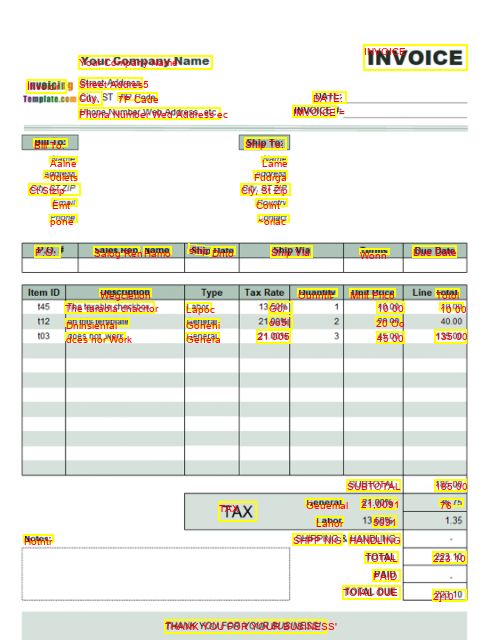

In [23]:
# Draw bounding boxes
font = PIL.ImageFont.truetype("/content/Arial Unicode MS.TTF?raw=true",10)
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in results:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
        print(bound[1])
        draw.text(p0, bound[1], font = font, fill ="red", align ="left")
    return image

draw_boxes(Image.open(IMAGE_PATH), results)

# Tessaract - High level Inference

In [24]:
%matplotlib inline
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,867 kB/s)
debconf: unable to initi

In [209]:
import pytesseract
import shutil
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from pytesseract import Output
from google.colab.patches import cv2_imshow

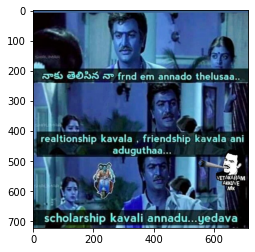

In [210]:
IMAGE_PATH = "/content/609bb7b5e866cd5a334568d72a08ff7e.jpg"
im = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)
#im = cv2.bitwise_not(im)
plt.imshow(im)
plt.show()

In [211]:
extract = pytesseract.image_to_string(im)
print(extract)

 

realtionship kavala , ae Pere ee
aduguthaa...
ae |

   

j Bees PENT plerny rea

— —— ee a



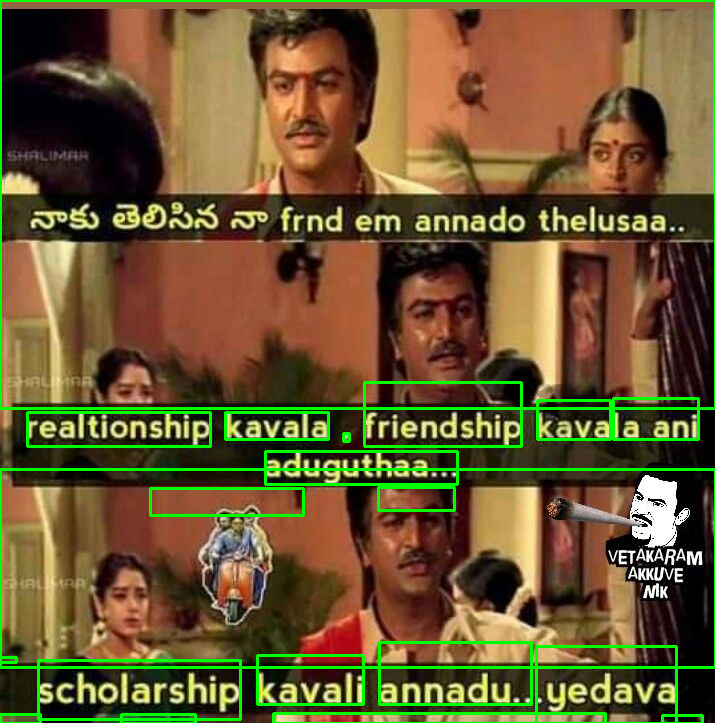

In [212]:
img = cv2.imread(IMAGE_PATH)

d = pytesseract.image_to_data(im, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    if(d['text'][i] != ""):
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)

In [213]:
!wget https://pysource.com/wp-content/uploads/2020/04/book_page-873x1024.jpg

--2021-08-25 10:48:06--  https://pysource.com/wp-content/uploads/2020/04/book_page-873x1024.jpg
Resolving pysource.com (pysource.com)... 104.21.67.193, 172.67.180.33, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|104.21.67.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98790 (96K) [image/jpeg]
Saving to: ‘book_page-873x1024.jpg.1’

book_page-873x1024. 100%[===================>]  96.47K   212KB/s    in 0.5s    

2021-08-25 10:48:07 (212 KB/s) - ‘book_page-873x1024.jpg.1’ saved [98790/98790]



Design before you implement

 

jementation. Another 80/20 rule says that 20 per
E yer cent of th

h any design project cause 80 per cent of the t
costs or overr

imp!
Jems wit
and that 80
and are hugely x!
jn some cases retooling.

per cent of these critical problems arise in the d
in the 1

pensive to correct later, requiring massive r

 



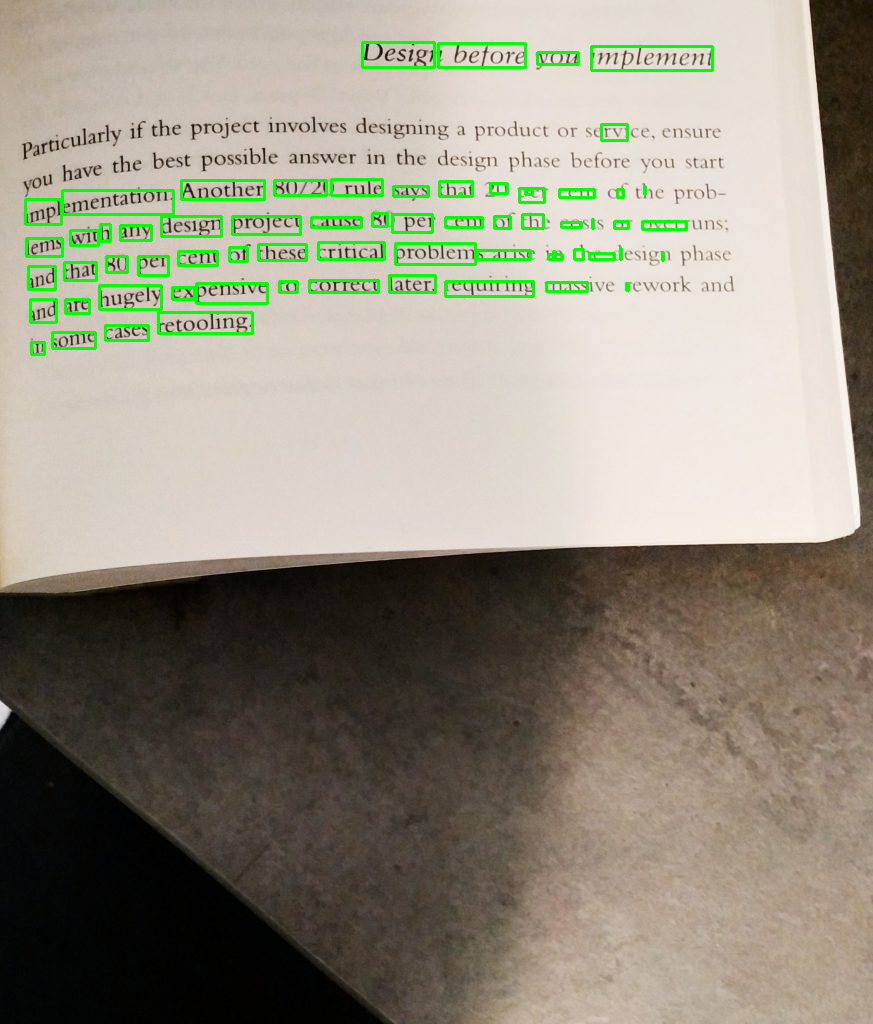

In [227]:
IMAGE_PATH = "/content/book_page-873x1024.jpg"
im = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)

extract = pytesseract.image_to_string(im)
print(extract)

d = pytesseract.image_to_data(im, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    if(d['text'][i] != ""):
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(im)

In [222]:
# 1. Open the Image 
img = cv2.imread(IMAGE_PATH)
# 2. Resize the image
img = cv2.resize(img, None, fx=0.5, fy=0.5)
# 3. Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 4. Convert image to black and white (using adaptive threshold)
adaptive_threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 11)

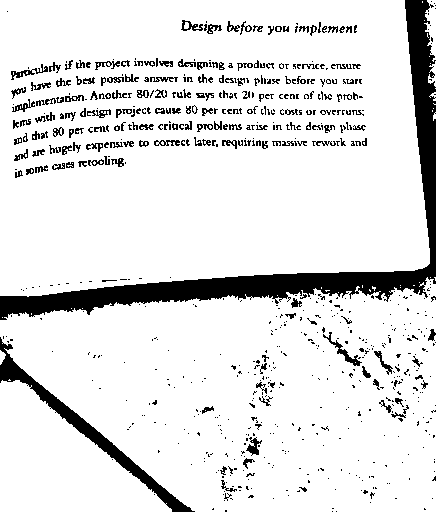

Design before you implement

rly if te project involves designing a product or service ensure
the best powible answer in the design phase before you sare

tion, Another 80/20 rule mys that 2b per cent of che probe

Sh any design project cause 80 per cent ofthe costs or oversuns
Fens wp per cent of there critical problems arse inthe design hse
iy expensive 0 correct ater, requiring massive rework and

your

nent

 



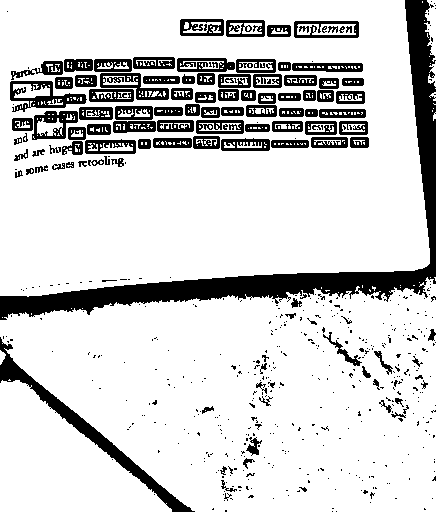

In [226]:
cv2_imshow(adaptive_threshold)

extract = pytesseract.image_to_string(adaptive_threshold, config=r'--psm 3')
print(extract)

d = pytesseract.image_to_data(adaptive_threshold, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    if(d['text'][i] != ""):
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(adaptive_threshold, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(adaptive_threshold)

**Terssaract Pre-processing configuration**

0 = Orientation and script detection (OSD) only.
1 = Automatic page segmentation with OSD.
2 = Automatic page segmentation, but no OSD, or OCR
3 = Fully automatic page segmentation, but no OSD. (Default)
4 = Assume a single column of text of variable sizes.
5 = Assume a single uniform block of vertically aligned text.
6 = Assume a single uniform block of text.
7 = Treat the image as a single text line.
8 = Treat the image as a single word.
9 = Treat the image as a single word in a circle.
10 = Treat the image as a single character.

# Text_Preprocessing_for_OCR

In [47]:
# gray scale
def gray(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# blur
def blur(img) :
    img_blur = cv2.GaussianBlur(img,(5,5),0)  
    return img_blur

# threshold
def threshold(img):
    #pixels with value below 100 are turned black (0) and those with higher value are turned white (255)
    img = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]    
    return img

**Some of the most basic and important Preprocessing techniques are:**-

1) Binarization
2) Noise Removal
3) Thinning and Skeletonization
4) Skewing

In [84]:
!wget "https://www.distcomp.com/images/services/Broadband-Billing-Invoice-ten4-rotated-2.png"

--2021-08-25 09:36:18--  https://www.distcomp.com/images/services/Broadband-Billing-Invoice-ten4-rotated-2.png
Resolving www.distcomp.com (www.distcomp.com)... 216.239.32.21
Connecting to www.distcomp.com (www.distcomp.com)|216.239.32.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85973 (84K) [image/png]
Saving to: ‘Broadband-Billing-Invoice-ten4-rotated-2.png’

Broadband-Billing-I 100%[===================>]  83.96K  --.-KB/s    in 0.07s   

2021-08-25 09:36:18 (1.20 MB/s) - ‘Broadband-Billing-Invoice-ten4-rotated-2.png’ saved [85973/85973]



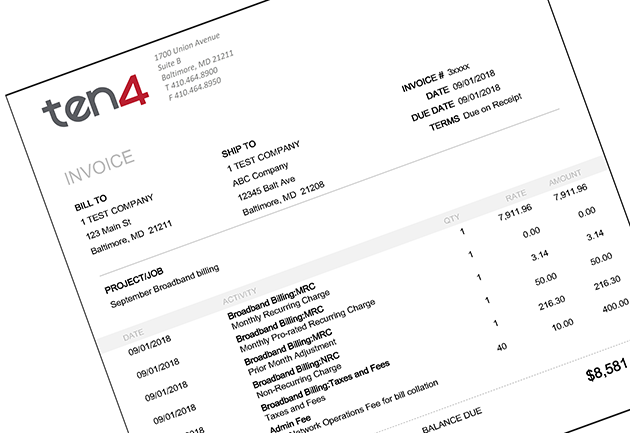

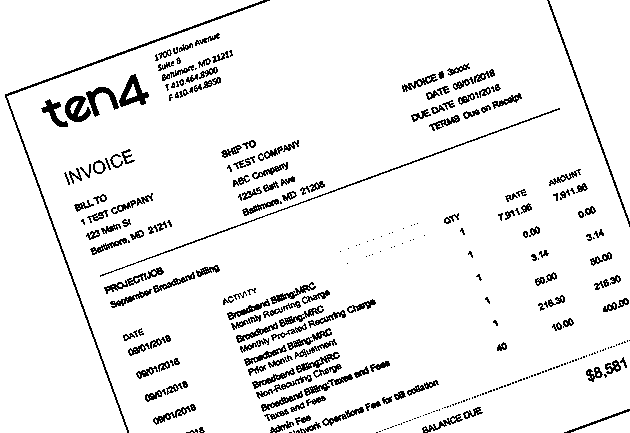

In [169]:
#1) Binarization

IMAGE_PATH = "Broadband-Billing-Invoice-ten4-rotated-2.png"

# 1. Open the Image 
img = cv2.imread(IMAGE_PATH)
cv2_imshow(img)

# 2. Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Convert image to black and white (using adaptive threshold)
adaptive_threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 11)

cv2_imshow(adaptive_threshold)

In [113]:
!wget "https://pyimagesearch.com/wp-content/uploads/2017/06/example_02.png"

--2021-08-25 10:04:51--  https://pyimagesearch.com/wp-content/uploads/2017/06/example_02.png
Resolving pyimagesearch.com (pyimagesearch.com)... 172.104.211.12
Connecting to pyimagesearch.com (pyimagesearch.com)|172.104.211.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43319 (42K) [image/png]
Saving to: ‘example_02.png’

example_02.png      100%[===================>]  42.30K  --.-KB/s    in 0.06s   

2021-08-25 10:04:51 (721 KB/s) - ‘example_02.png’ saved [43319/43319]



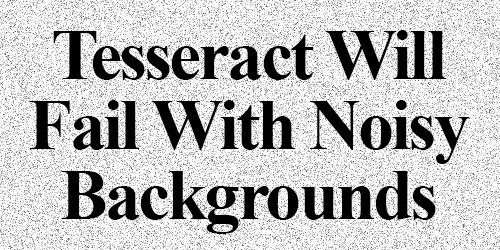

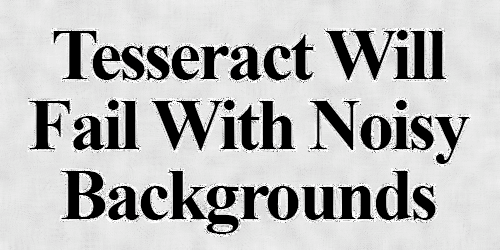

In [115]:
# denoising of image saving it into dst image 
IMAGE_PATH = "example_02.png"
img = cv2.imread(IMAGE_PATH)

dst = cv2.fastNlMeansDenoisingColored(img, None, 20, 10, 7, 15) 
# Plotting of source and destination image 

cv2_imshow(img)
cv2_imshow(dst)

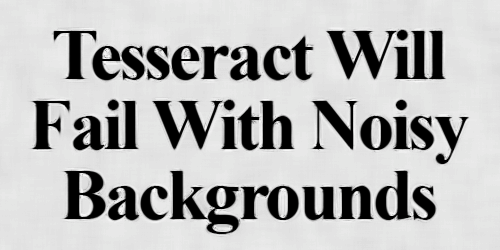

In [155]:
IMAGE_PATH = "example_02.png"
img = cv2.imread(IMAGE_PATH)
dst = cv2.fastNlMeansDenoisingColored(img, None, 200, 100, 0, 10) 

kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(dst,kernel,iterations = 2)
dst = cv2.fastNlMeansDenoisingColored(img, erosion, 50, 300, 8, 20) 

cv2_imshow(dst)

In [173]:
img = cv2.imread(IMAGE_PATH)

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
      angle = -(90 + angle)
    else:
      angle = -angle
      (h, w) = image.shape[:2]
      center = (w // 2, h // 2)
      M = cv2.getRotationMatrix2D(center, angle, 1.0)
      rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
      return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

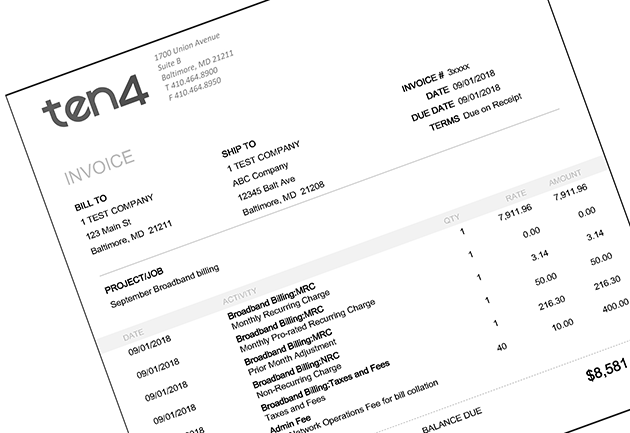

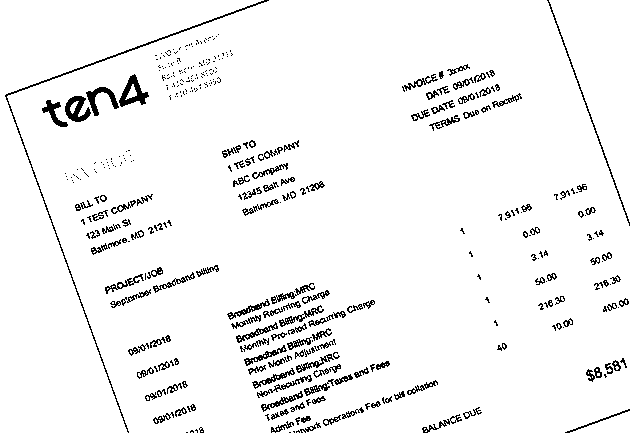

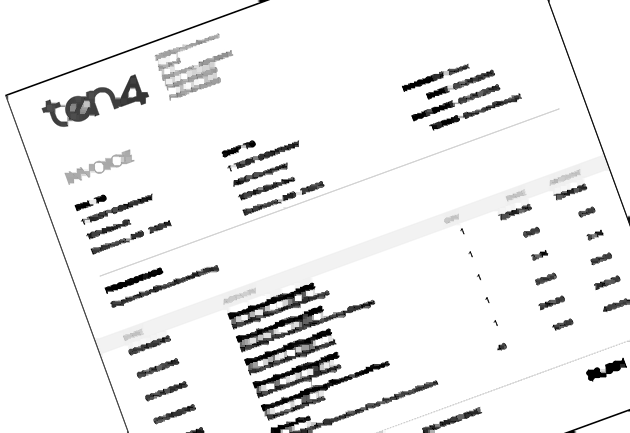

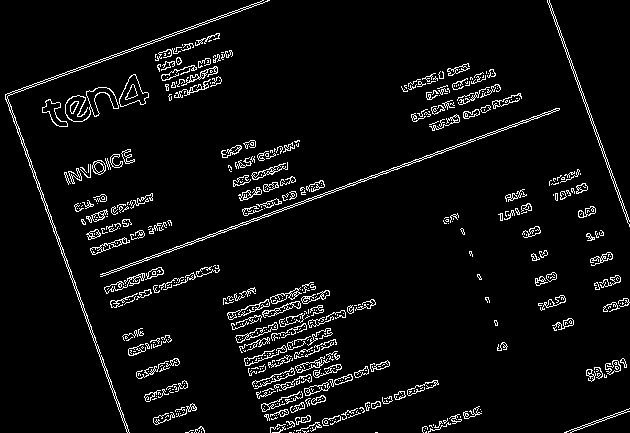

In [174]:
image = cv2.imread(IMAGE_PATH)

gray = get_grayscale(image)
cv2_imshow(gray)
thresh = thresholding(gray)
cv2_imshow(thresh)
opening = opening(gray)
cv2_imshow(opening)
canny = canny(gray)
cv2_imshow(canny)

In [175]:
custom_config = r'--oem 3 --psm 6'
print(pytesseract.image_to_string(img, config=custom_config))

te a
eee soe G01
Vv be oe
x os on
yh
+0 const oo on ®
ween ane pw? ®
nano ‘ 0 a
ea on ‘ a ge
e 4 °
0 oa cS po?
oe cette oot ‘ 2? a
Ro eae . 0
o* tO A.
oo eae »
oo" Fete ath oe
oe we
0 ‘
anette OE a



In [176]:
custom_config = r'--oem 3 --psm 6'
print(pytesseract.image_to_string(gray, config=custom_config))

Seat? EN att
Ver oe Ot
xD os on
yh
<0 ost eA No 2 aon
ween ane en®
nano ‘ o® a
ea on ‘ a ge
e 4 °
0 oa cS po?
oo cette oat? ‘ 26% a
Soo eae . 9
o* tO A.
on Seca °
oo" Fete ath oe
oe we
0 ‘
anette OE a



In [177]:
custom_config = r'--oem 3 --psm 6'
print(pytesseract.image_to_string(thresh, config=custom_config))

Seager EE OS
Vee oe Oat
xD onto
oe gor
0 pst eo aoe
eel eae e®
nee BT ‘ of a
ese - ‘ a ge
o , °
ose eno oe pe?
em ore 2 ‘ 20 so
‘on aes ‘ 9
of aoe 6,
on Seca °
soo ttt at at
rn
0 .
ae go cee a



In [178]:
custom_config = r'--oem 3 --psm 6'
print(pytesseract.image_to_string(opening, config=custom_config))

wR B&B
a. = ae
_ ee * <p



Seat? EN att
Ver oe Ot
xD os on
yh
<0 ost eA No 2 aon
ween ane en®
nano ‘ o® a
ea on ‘ a ge
e 4 °
0 oa cS po?
oo cette oat? ‘ 26% a
Soo eae . 9
o* tO A.
on Seca °
oo" Fete ath oe
oe we
0 ‘
anette OE a



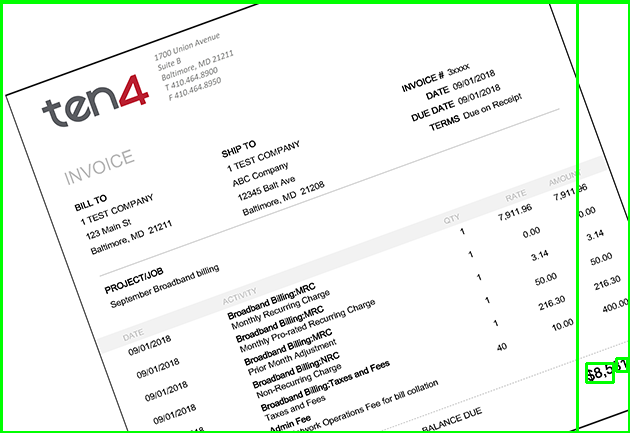

In [182]:
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(gray)
print(pytesseract.image_to_string(gray, config=custom_config))
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(img)

In [184]:
from pytesseract import Output

In [185]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


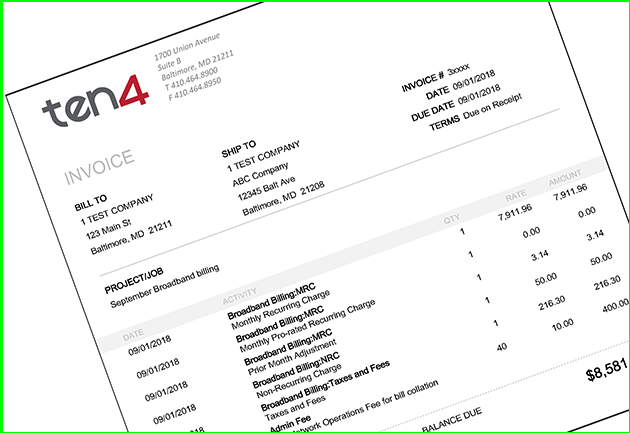

In [194]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)

In [196]:
!wget "https://nanonets.com/blog/content/images/2019/12/greek-thai.png"

--2021-08-25 10:37:48--  https://nanonets.com/blog/content/images/2019/12/greek-thai.png
Resolving nanonets.com (nanonets.com)... 99.86.37.74, 99.86.37.121, 99.86.37.113, ...
Connecting to nanonets.com (nanonets.com)|99.86.37.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63914 (62K) [image/png]
Saving to: ‘greek-thai.png’

greek-thai.png      100%[===================>]  62.42K  --.-KB/s    in 0.007s  

2021-08-25 10:37:48 (8.86 MB/s) - ‘greek-thai.png’ saved [63914/63914]



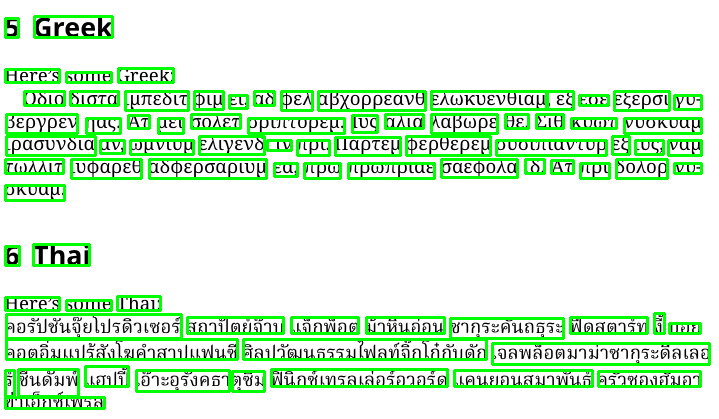

In [204]:
import cv2
import pytesseract
img = cv2.imread(('/content/greek-thai.png'))

from pytesseract import Output
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    if(d['text'][i] != ""):
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)